/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, '$\\rho_{DM}$ [M$_{\\odot}$ kpc$^{-3}$]')

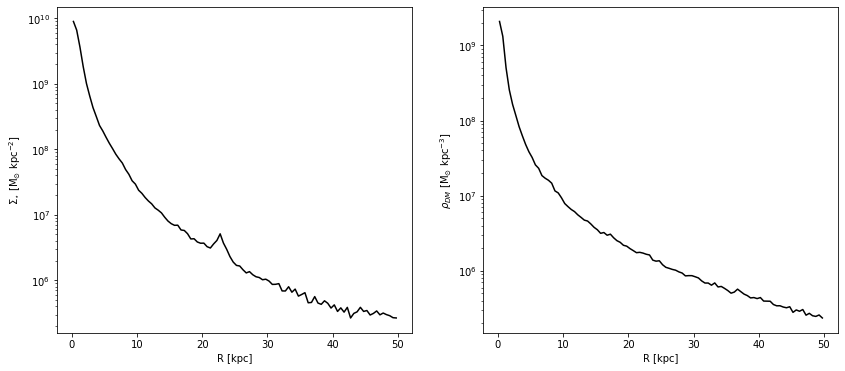

In [1]:
import pynbody
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

# convert all units to something reasonable (kpc, Msol etc)
s.physical_units()

# create a profile object for the stars (by default this is a 2D profile)
p = pynbody.analysis.profile.Profile(h[1].s, vmin =.01, max=50)

# make the figure and sub plots
f, axs = plt.subplots(1,2,figsize=(14,6))

# make the plot
axs[0].plot(p['rbins'],p['density'], 'k')
axs[0].semilogy()
axs[0].set_xlabel('R [kpc]')
axs[0].set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(h[1].d,min=.01,max=50,ndim=3)

axs[1].plot(p['rbins'],p['density'], 'k')
axs[1].semilogy()
axs[1].set_xlabel('R [kpc]')
axs[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')

In [2]:
import pynbody; 

from pynbody.analysis import profile;

import matplotlib.pylab as plt

# load test data
s = pynbody.load('testdata/g15784.lr.01024'); 

# change to physical units
s.physical_units()

h = s.halos()

# Analyze the angular momentum of all the particle for halo one and turn the halo
# to face on
pynbody.analysis.angmom.faceon(h[1])


In [3]:
# Get the profiles of the stars of halo 1 between 0.01 to 50 kpcs in x and y
p = profile.Profile(h[1].s, rmin='.01 kpc', rmax='50 kpc')

/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


In [4]:
# same as above but for dark matter and a bigger range
pdm_sph = profile.Profile(s.d, rmin = '.01 kpc', rmax = '250 kpc')

In [5]:
# prints what functions go into profiles
p.derivable_keys()

['weight_fn',
 'mass',
 'density',
 'fourier',
 'pattern_frequency',
 'mass_enc',
 'density_enc',
 'dyntime',
 'g_spherical',
 'rotation_curve_spherical',
 'j_circ',
 'v_circ',
 'E_circ',
 'pot',
 'omega',
 'kappa',
 'beta',
 'magnitudes',
 'sb',
 'Q',
 'X',
 'jtot',
 'j_theta',
 'j_phi']

Text(0, 0.5, '[Fe/H]')

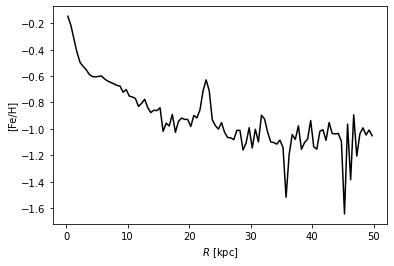

In [7]:
# Plots the radius in kpc vs [Fe/H] ratio for stars within the
# range defined in varaible p. Not sure what the third thing is for
plt.plot(p['rbins'].in_units('kpc'),p['feh'],'k')

plt.xlabel('$R$ [kpc]'); plt.ylabel('[Fe/H]')

In [8]:
# creating your own profile fuction

@profile.Profile.profile_property
def random(self):
   import numpy as np
   return np.random.rand(self.nbins)

In [9]:
# profiles of everything in the simulation between 0.01kpc to 250 kpc
p_all = profile.Profile(s, rmin='.01 kpc', rmax='250 kpc')

p_all['pot'][0:10] # returns the potential profile of 10 objects

pynbody.analysis.profile : Profile pot -- this routine assumes the disk is in the x-y plane


SimArray([-1883725.20605628, -1774955.4230129 , -1722218.33725498,
          -1690633.68613091, -1668854.69876004, -1652878.17689281,
          -1640433.23593114, -1630243.68972168, -1621605.13215674,
          -1614220.30221359], 'km**2 s**-2')

In [10]:
p_all['d_pot'][0:10] # returns d phi / dr from p["phi"]

SimArray([43509.6536035 , 32302.66586689, 16865.02197728, 10673.15462517,
           7551.40390378,  5684.51994658,  4527.07851737,  3765.77138574,
           3204.80569384,  2767.54060378], 'km**2 kpc**-1 s**-2')

Text(0, 0.5, '$\\sigma_{r}$')

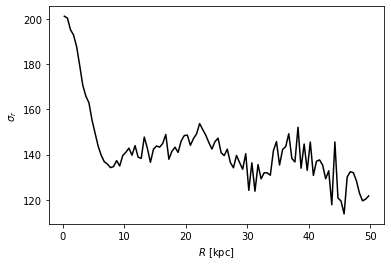

In [15]:
# Added the _disp for dispersion of velocity 
plt.clf(); plt.plot(p['rbins'].in_units('kpc'),p['vr_rms'].in_units('km s^-1'),'k')

plt.xlabel('$R$ [kpc]'); plt.ylabel('$\sigma_{r}$')

/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, '[Fe/H]')

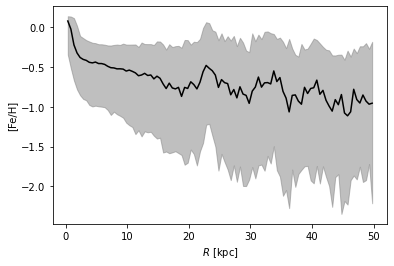

In [18]:
# Define a Quantile profile for the stars of halo 1
p_quant = profile.QuantileProfile(h[1].s, rmin = '0.1 kpc', rmax = '50 kpc')

# clears the figure and plots radius in kpc vs Fe/H 
plt.clf(); plt.plot(p_quant['rbins'], p_quant['feh'][:,1], 'k')

# Shades in one standard deviation away from the line.
plt.fill_between(p_quant['rbins'], p_quant['feh'][:,0], p_quant['feh'][:,2], color = 'Grey', alpha=0.5)

plt.xlabel('$R$ [kpc]'); plt.ylabel('[Fe/H]')


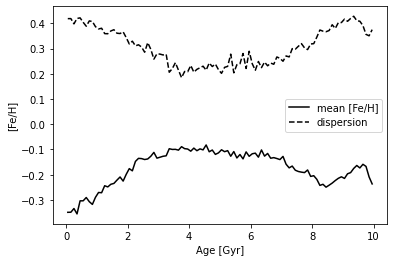

In [19]:
# Converts the age of stars into Billions of years
s.s['age'].convert_units('Gyr')

# get the profiles of the star for halo one and calculate the average age
# using the lambda fucntion with a maximum age of 10 billion years
p_age = profile.Profile(h[1].s, calc_x = lambda x: x.s['age'], rmax = '10 Gyr')

# clear the plot and plot radius vs metallicity and give them labels
plt.clf(); plt.plot(p_age['rbins'], p_age['feh'], 'k', label = 'mean [Fe/H]')

# plot radius of the star vs the metallicity dispersion, change to dash line
# and label it
plt.plot(p_age['rbins'], p_age['feh_disp'], 'k--', label = 'dispersion')


plt.xlabel('Age [Gyr]'); plt.ylabel('[Fe/H]')


plt.legend()


Text(0, 0.5, '$\\rho_{\\star}$ [M$_{\\odot}$ pc$^{-3}$]')

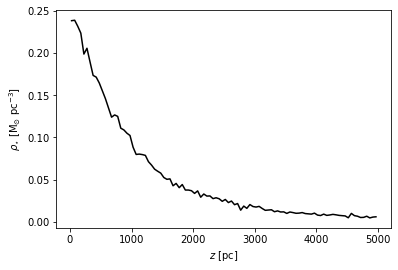

In [20]:
# Get vertical profile of halo one's stars between 3kpc and 5kpc maximum z = 5kpc
p_vert = profile.VerticalProfile(h[1].s, '3 kpc', '5 kpc', '5 kpc')

# Clear plot and plot radius vs density in units of Msol per pc^-3
plt.clf(); plt.plot(p_vert['rbins'].in_units('pc'), p_vert['density'].in_units('Msol pc^-3'),'k')


plt.xlabel('$z$ [pc]'); plt.ylabel(r'$\rho_{\star}$ [M$_{\odot}$ pc$^{-3}$]')


In [22]:
s.rotate_x(60) # rotate the snapshot by 60-degrees

p_inc = profile.InclinedProfile(h[1].s, 60, rmin = '0.1 kpc', rmax = '50 kpc')
